# Filtros FIR e IIR

In [1]:
import pandas as pd
import numpy as np
import math
from scipy.fft import fft, ifft
import scipy.signal as sg
from statsmodels.graphics.tsaplots import plot_acf
from scipy import interpolate
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use("seaborn")
sns.set(style="white")

## FIR3 de Hanning

<AxesSubplot:xlabel='N', ylabel='value'>

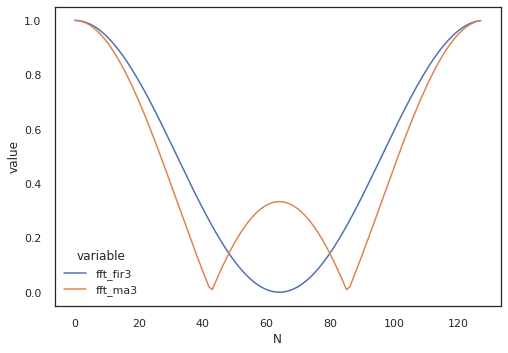

In [25]:
N = 128

fir3 = np.zeros(N)
fir3[0] = 1/4
fir3[1] = 1/2
fir3[2] = 1/4

ma3 = np.zeros(N)
ma3[0:3] = 1/3

df_fir3 = pd.DataFrame({
    'N': np.arange(N),
    'fft_fir3': np.abs(fft(fir3)),
    'fft_ma3': np.abs(fft(ma3))
})

sns.lineplot(x="N", y="value", hue='variable', data=pd.melt(df_fir3, 'N'))

## FIR5 de Hanning

<AxesSubplot:xlabel='N', ylabel='value'>

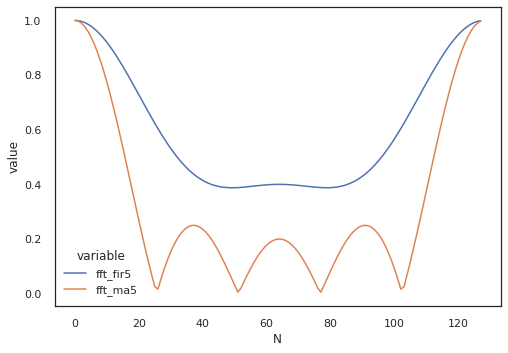

In [26]:
N = 128

fir5 = np.zeros(N)
fir5[0] = 0.05
fir5[1] = 0.15
fir5[2] = 0.6
fir5[3] = 0.15
fir5[4] = 0.05

ma5 = np.zeros(N)
ma5[0:5] = 1/5

df_fir5 = pd.DataFrame({
    'N': np.arange(N),
    'fft_fir5': np.abs(fft(fir5)),
    'fft_ma5': np.abs(fft(ma5))
})

sns.lineplot(x="N", y="value", hue='variable', data=pd.melt(df_fir5, 'N'))

<AxesSubplot:xlabel='N', ylabel='value'>

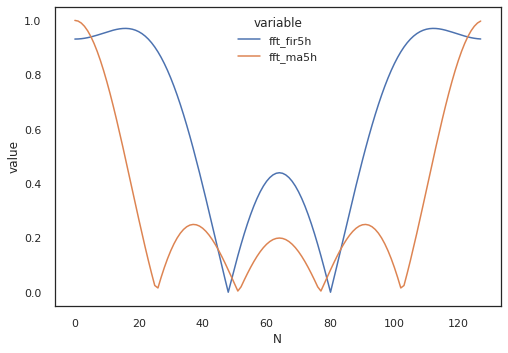

In [27]:
N = 128

fir5h = np.zeros(N)
fir5h[0] = -3/25
fir5h[1] = 12/35
fir5h[2] = 17/35
fir5h[3] = 12/35
fir5h[4] = -3/25

ma5h = np.zeros(N)
ma5h[0:5] = 1/5

df_fir5h = pd.DataFrame({
    'N': np.arange(N),
    'fft_fir5h': np.abs(fft(fir5h)),
    'fft_ma5h': np.abs(fft(ma5h))
})

sns.lineplot(x="N", y="value", hue='variable', data=pd.melt(df_fir5h, 'N'))

## Ejemplo derivadas de 2, 3 y 4 muestras

<AxesSubplot:xlabel='N', ylabel='value'>

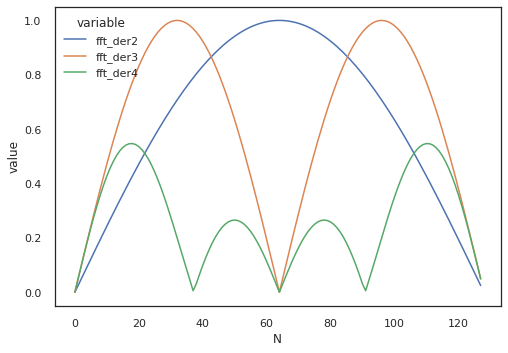

In [30]:
N = 128

der2 = np.zeros(N)
der2[0] = 1/2
der2[1] = -1/2

der3 = np.zeros(N)
der3[0] = 1/2
der3[2] = -1/2

der4 = np.zeros(N)
der4[0] = 2/10
der4[1] = 1/10
der4[3] = -1/10
der4[4] = -2/10

df_der = pd.DataFrame({
    'N': np.arange(N),
    'fft_der2': np.abs(fft(der2)),
    'fft_der3': np.abs(fft(der3)),
    'fft_der4': np.abs(fft(der4))
})

sns.lineplot(x="N", y="value", hue='variable', data=pd.melt(df_der, 'N'))

## Filtros IIR

<AxesSubplot:xlabel='N', ylabel='value'>

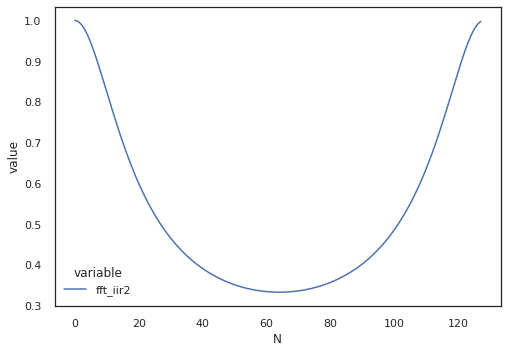

In [35]:
N = 128

x = np.zeros(N)
x[2] = 1

iir2 = np.zeros(N)
a = 0.5
b = -0.5

for n in range(1,N):
    iir2[n] = a*x[n] - b*iir2[n-1]


df_iir = pd.DataFrame({
    'N': np.arange(N),
    'fft_iir2': np.abs(fft(iir2))
})

sns.lineplot(x="N", y="value", hue='variable', data=pd.melt(df_iir, 'N'))

### IIR2b

<AxesSubplot:xlabel='N', ylabel='value'>

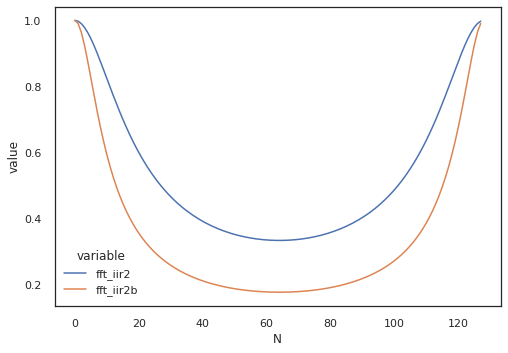

In [39]:
iir2b = np.zeros(N)
a = 0.3
b = -0.7

for n in range(1,N):
    iir2b[n] = a*x[n] - b*iir2b[n-1]


df_iir['fft_iir2b'] = np.abs(fft(iir2b))

sns.lineplot(x="N", y="value", hue='variable', data=pd.melt(df_iir, 'N'))

## Derivada con IIR

<AxesSubplot:xlabel='N', ylabel='value'>

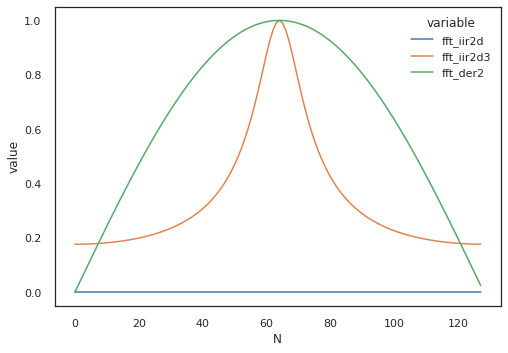

In [148]:
iir2d = np.repeat(0, N)
a = 0.5
b = 0.5

iir2d3 = np.zeros(N)
c = 0.3
d = 0.7

for n in range(1,N):
    iir2d[n] = a*x[n] - b*iir2d[n-1]
    iir2d3[n] = c*x[n] - d*iir2d3[n-1]
    
df_derivada = pd.DataFrame({
    'N': np.arange(N),
    'fft_iir2d': np.abs(fft(iir2d)),
    'fft_iir2d3': np.abs(fft(iir2d3)),
    'fft_der2': np.abs(fft(der2))
})

sns.lineplot(x="N", y="value", hue='variable', data=pd.melt(df_derivada, 'N'))

## Aplicacion de FIR e IIR

In [146]:
dato = pd.read_csv('./data/TS_1.csv', index_col=0)
dato.reset_index(drop=True,inplace=True)
dato.head(300)
len(dato.a)

260

### Aplicacion derivada FIR de 3 muestras

<AxesSubplot:xlabel='t', ylabel='a'>

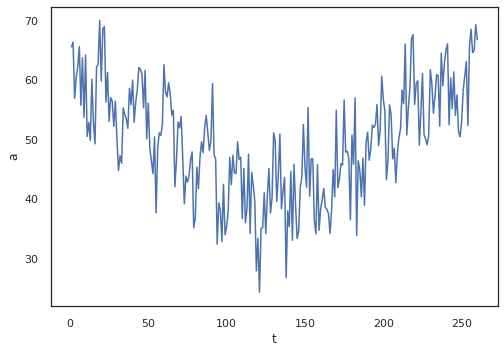

In [74]:
sns.lineplot(x=dato.t, y=dato.a)

<AxesSubplot:xlabel='t', ylabel='value'>

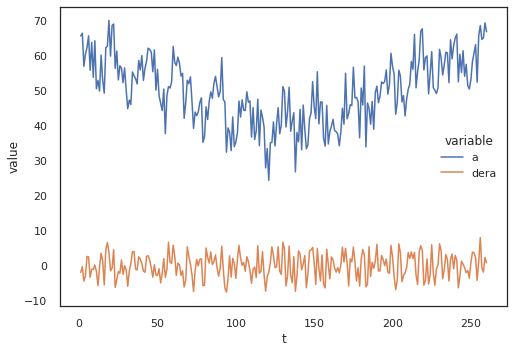

In [155]:
dera = sg.lfilter([0.5, 0, -0.5], 1.0, list(dato.a)[-2:] + list(dato.a))
df_dera = pd.DataFrame({
    't': dato.t,
    'a': dato.a,
    'dera':  pd.Series(dera[2:])
})
sns.lineplot(x='t', y='value', hue='variable', data=pd.melt(df_dera, 't'))

[(0.0, 100.0), (0.0, 1000.0)]

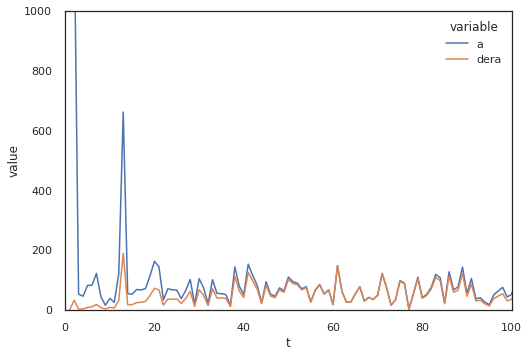

In [156]:
df_fft = pd.DataFrame({
    't': df_dera.t,
    'a': np.abs(fft(df_dera.a.values)),
    'dera': np.abs(fft(df_dera.dera.values))
})

g = sns.lineplot(x='t', y='value', hue='variable', data=pd.melt(df_fft, 't'))
g.set(xlim=(0, 100), ylim=(0, 1000))

### Aplicacion FIR de Hanning

<AxesSubplot:xlabel='t', ylabel='value'>

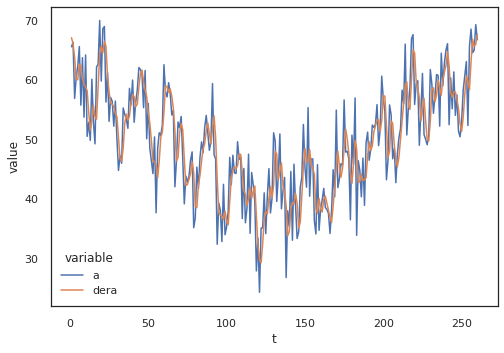

In [157]:
h3a = sg.lfilter([0.25, 0.5, 0.25], 1.0, list(dato.a)[-2:] + list(dato.a))
df_hanning = pd.DataFrame({
    't': dato.t,
    'a': dato.a,
    'dera':  pd.Series(h3a[2:])
})
sns.lineplot(x='t', y='value', hue='variable', data=pd.melt(df_hanning, 't'))

[(0.0, 100.0), (0.0, 1000.0)]

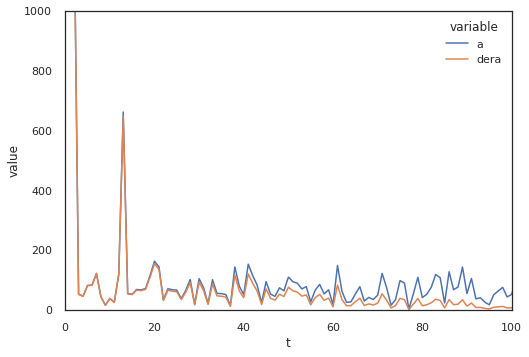

In [158]:
df_h3_fft = pd.DataFrame({
    't': df_hanning.t,
    'a': np.abs(fft(df_hanning.a.values)),
    'dera': np.abs(fft(df_hanning.dera.values))
})

g = sns.lineplot(x='t', y='value', hue='variable', data=pd.melt(df_h3_fft, 't'))
g.set(xlim=(0, 100), ylim=(0, 1000))